In [68]:
import numpy as np
import pydgrid.solar as pv
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
%matplotlib notebook

In [70]:
pv_1 = pv.pv_gen()

q = pv_1.radiation_on_panel_eval(1,10,00)


In [93]:
sampling = '10min'
drange = pd.date_range(start='2019-01-01',end='2019-12-31', freq='10min')
radiations_on_panel = pv_1.radiations(drange)

<IPython.core.display.Javascript object>


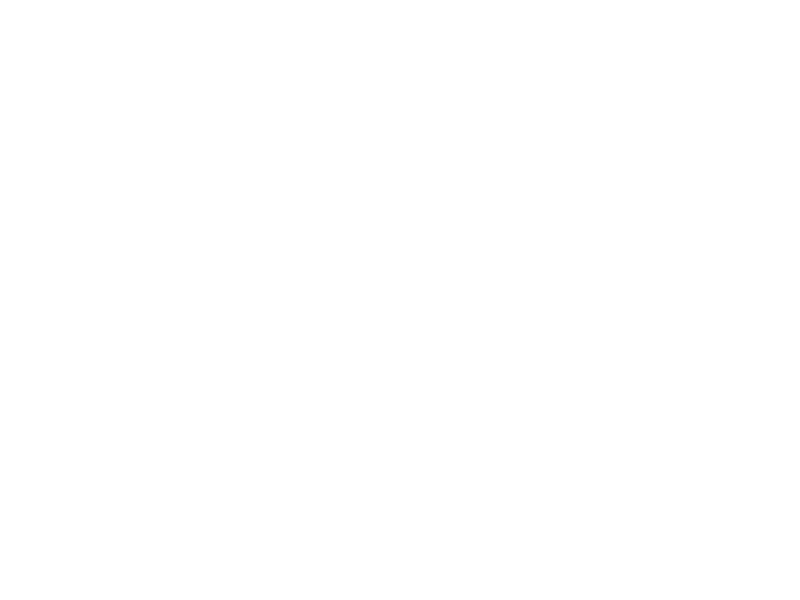

In [45]:
fig, ax = plt.subplots(dpi=50)
ax.plot(drange[1:],pv_1.radiation_on_panel_clear_sky)

In [94]:
N_cables = 3
rho = 1.68E-08
Rendimiento = 0.1
Area = 897.6
V_dc = 477
Costo_kWh = 0.44
Longitud = 45
Años_de_vida = 20
CO2_kWh = 0.39
CO2_kg = 6.39


p = pv_1.radiation_on_panel_clear_sky*Area*Rendimiento

In [107]:
cables = {35:{'r_km':1.15},
          50:{'r_km':0.85},
          70:{'r_km':0.59},
          95:{'r_km':0.42},
         120:{'r_km':0.34},
         150:{'r_km':0.27},
         185:{'r_km':0.22},
         240:{'r_km':0.17}}


In [111]:
i = p/N_cables/V_dc
seccion = 185
R = cables[seccion]['r_km']/np.sqrt(3)*Longitud/1000
p_loss = R*i**2
E_joulios = np.sum(p_loss)*60*10*N_cables
E_kWh = E_joulios/3600/1000
Costo_año = E_kWh*Costo_kWh
Costo_perdidas = Costo_año*Años_de_vida
print(f'E = {E_kWh:0.2f} kWh')
print(f'Costo año = {Costo_año:0.2f} €/año')
print(f'Costo perdidas = {Costo_perdidas:0.2f} €/año')

E = 178.64 kWh
Costo año = 78.60 €/año
Costo perdidas = 1572.05 €/año


<IPython.core.display.Javascript object>


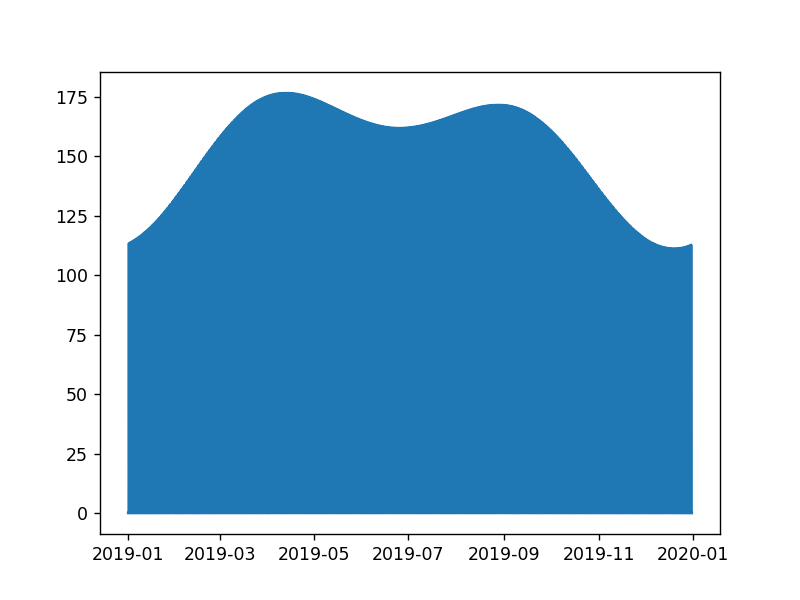

In [97]:
fig, ax = plt.subplots(dpi=50)
ax.plot(drange[1:],p_loss)

In [98]:
E_kWh

1870.9143465582715

In [99]:
np.max(i)

76.86792550187654

In [91]:
R

0.02987787643056313